<a href="https://colab.research.google.com/github/Hijaan/Dicoding_HIjaan/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Hasbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [3]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [4]:
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [6]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

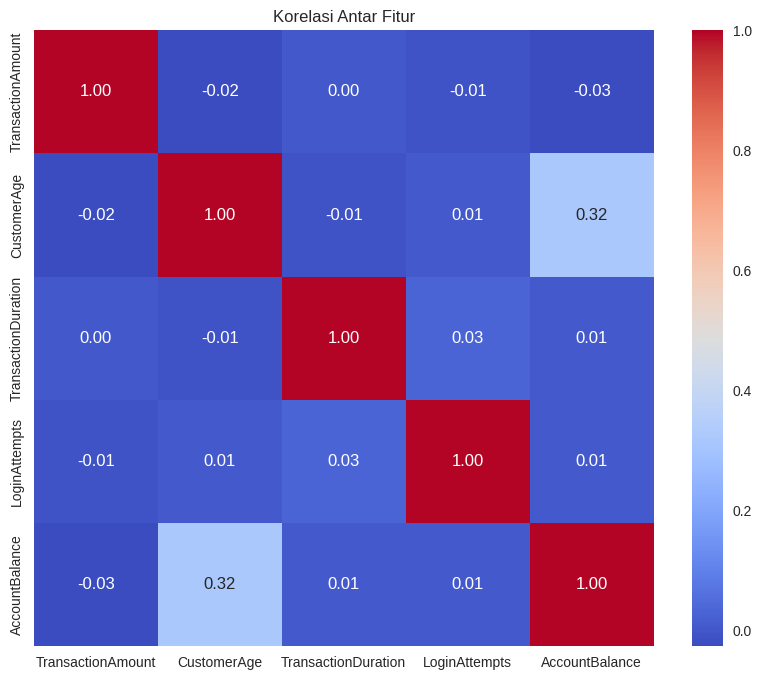

In [7]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

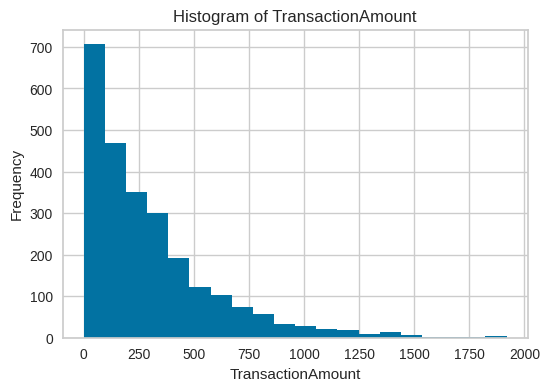

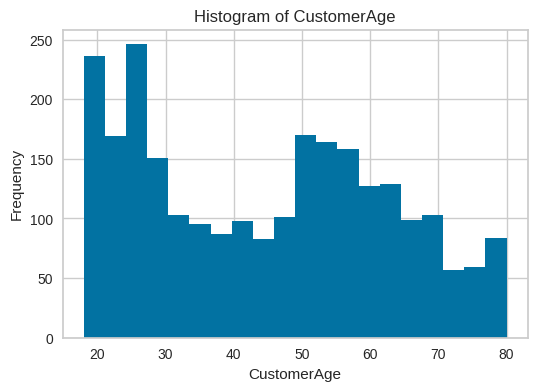

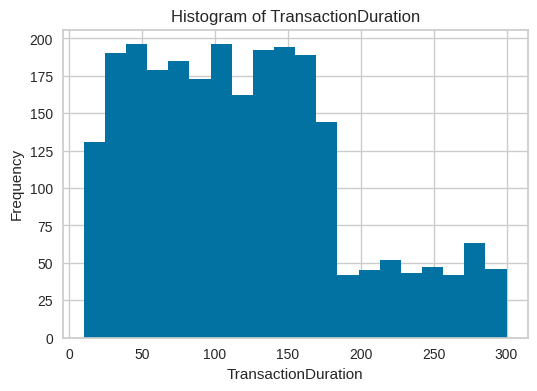

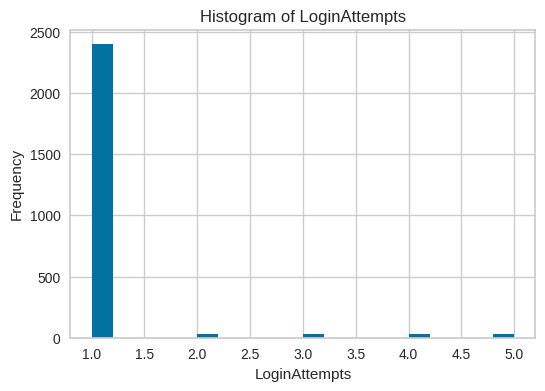

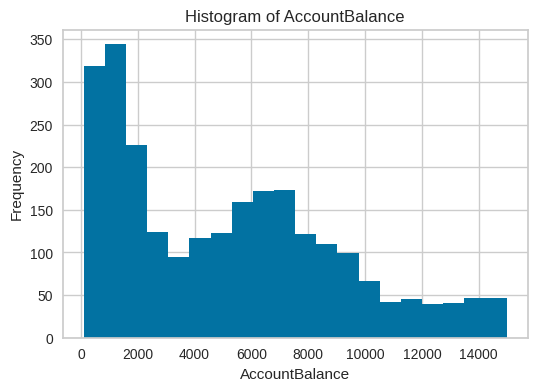

In [8]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
for col in numerical_df:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

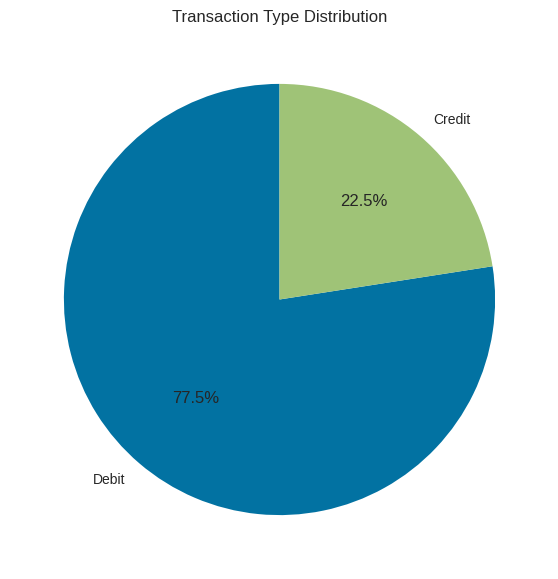

In [9]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Menggunakan visualisasi untuk fitur TransactionType
plt.figure(figsize=(7, 7))
df['TransactionType'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Transaction Type Distribution')
plt.ylabel('') # Hide the default y-label for pie chart
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [10]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [11]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [12]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scale = StandardScaler()
df_scaled = scale.fit_transform(numerical_df)
df_scaled = pd.DataFrame(df_scaled, columns=numerical_df.columns)
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,-0.972736,NaN,1.121495,-0.204629,0.594263


In [13]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_category = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID','IP Address'], inplace=True)

In [14]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
label = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object','category', 'bool']).columns
encoders = {}
for col in categorical_cols:
    df[col] = label.fit_transform(df[col])
    encoders[col] = label
# Pastikan kamu menggunakan function head setelah melalukan encod
df.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163
4,13.45,1939,0,1,2,NaN,3,198.0,1.0,7429.40,16


In [15]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [16]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_nna = df.dropna()

In [17]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_raw = df_nna.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [53]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numerical_df_raw = df_raw.select_dtypes(include=['float64', 'int64'])

Q1 = numerical_df_raw.quantile(0.25)
Q3 = numerical_df_raw.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in the numerical columns
outlier_condition = ((numerical_df_raw < (Q1 - 1.5 * IQR)) | (numerical_df_raw > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter df_raw dair outlier kemudian dibuat copynya
df_clean = df_raw[~outlier_condition].copy()

# menampilkan perbandingan jumlah data sbeelum dihapus outliernya dan sesudah dihapus outliernya
print(f"Shape before outlier removal: {df_raw.shape}")
print(f"Shape after outlier removal: {df_clean.shape}")

display(df_clean.head())

Shape before outlier removal: (2398, 11)
Shape after outlier removal: (1662, 11)


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13


In [54]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
age_bins = [0, 25, 40, 60, 100]
age_labels = ['Remaja', 'Dewasa', 'Separuh Baya', 'Lanjut Usia']
df_clean['CustomerAge_binned'] = pd.cut(df_clean['CustomerAge'], bins=age_bins, labels=age_labels, right=False)

amount_bins = [0, 100, 500, 1000, 2000]
amount_labels = ['Rendah', 'Menengah ', 'Tinggi', 'Sangat Tinggi']
df_clean['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=amount_bins, labels=amount_labels, right=False)

# Display the head of the dataframe with new binned and encoded columns
display(df_clean[['CustomerAge', 'CustomerAge_binned',
            'TransactionAmount', 'TransactionAmount_binned']])

,CustomerAge,CustomerAge_binned,TransactionAmount,TransactionAmount_binned
0,70.0,Lanjut Usia,14.09,Rendah
1,68.0,Lanjut Usia,376.24,Menengah
2,19.0,Remaja,126.29,Menengah
3,26.0,Dewasa,184.50,Menengah
5,18.0,Remaja,92.15,Rendah
...,...,...,...,...
2508,48.0,Separuh Baya,251.54,Menengah
2509,56.0,Separuh Baya,28.63,Rendah
2510,23.0,Remaja,185.97,Menengah
2523,76.0,Lanjut Usia,12.18,Rendah


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [49]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_clean.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.0,1662.000000,1662.000000
mean,252.115975,1242.495187,1.0,21.375451,0.925993,44.334537,1.531889,119.035499,1.0,5070.195806,182.354994
std,214.119961,729.956974,0.0,12.405785,0.842110,17.759413,1.154999,70.776296,0.0,3846.200085,103.488718
min,0.260000,0.000000,1.0,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,101.250000,0.000000
25%,77.462500,614.250000,1.0,11.000000,0.000000,27.000000,0.000000,61.000000,1.0,1465.105000,95.000000
50%,193.680000,1235.500000,1.0,21.000000,1.000000,44.000000,2.000000,111.500000,1.0,4714.360000,183.000000
75%,371.240000,1873.750000,1.0,32.000000,2.000000,59.000000,3.000000,163.000000,1.0,7619.557500,271.000000
max,903.190000,2485.000000,1.0,43.000000,3.000000,80.000000,4.000000,300.000000,1.0,14977.990000,360.000000


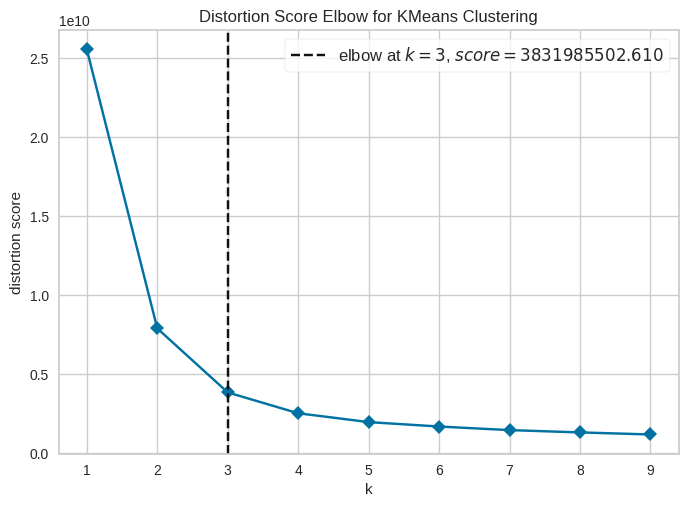

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Handle missing values in numerical_df before fitting
numerical_df_cleaned = df_clean.select_dtypes(include=['float64', 'int64'])

kmeans = KMeans(random_state=42, n_init=10) # Added random_state for reproducibility and n_init for clarity
visualizer = KElbowVisualizer(kmeans, k=(1,10), timings=False)
visualizer.fit(numerical_df_cleaned)
visualizer.show()


In [76]:
# Menggunakan algoritma K-Means Clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added random_state for reproducibility and n_init for clarity
kmeans.fit(numerical_df_cleaned)
label = kmeans.labels_
df['Cluster'] = pd.Series(label, index=numerical_df_cleaned.index)
clean_df = df.dropna()
display(clean_df.head())

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target,Target,Cluster
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1.0,0.0,0.0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,0.0,2.0,2.0
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1.0,1.0,1.0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0.0,0.0,0.0
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,1.0,1.0,1.0


Jalankan cell code ini untuk menyimpan model kamu.

In [77]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(df,"model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [57]:
# Menghitung dan menampilkan nilai Silhouette Score.
X, y = numerical_df_cleaned, label
silhouette_avg = silhouette_score(X, y)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5576008152492976


Text(0, 0.5, 'Fitur 2')

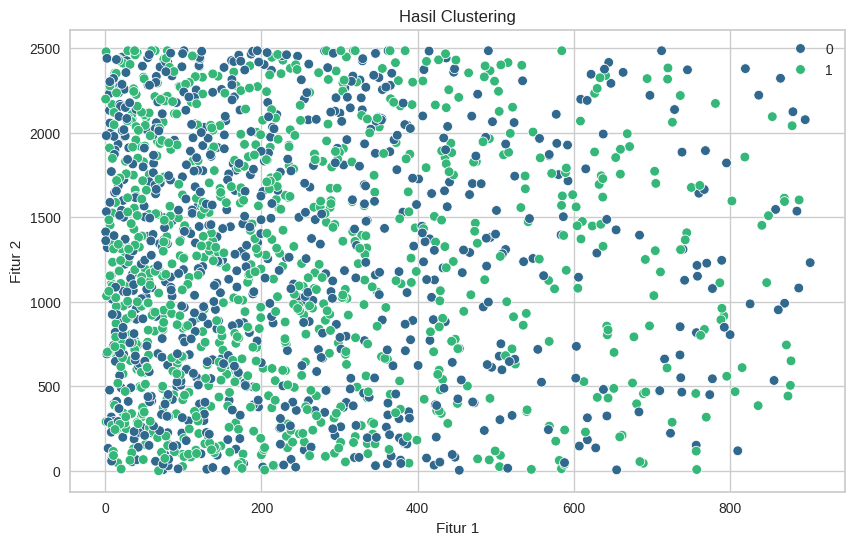

In [42]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='viridis')
plt.title('Hasil Clustering')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [43]:
# Membangun model menggunakan PCA.
pca =PCA(n_components=2)
numerical_pca = pca.fit_transform(numerical_df_cleaned)
#Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
final_df = pd.DataFrame(numerical_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(final_df)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [58]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(final_df, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
- **Cluster 1: ()**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:**

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [61]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

In [62]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [71]:
# inverse dataset ke rentang normal untuk numerikal
# Ensure the indices match before inverse transforming and assigning
inverse_transformed_data = scale.inverse_transform(df_scaled.loc[clean_df.index, numerical_df.columns])

# Membersihkan data dan menggunakkan copy agar data tidak
clean_df = clean_df.copy()
clean_df[numerical_df.columns] = inverse_transformed_data

# tampilkan dataset yang sudah di-inverse
display(clean_df.head())

/tmp/ipython-input-3119367520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[numerical_df.columns] = inverse_transformed_data


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1.0,0.0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,0.0,2.0
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1.0,1.0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0.0,0.0
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,1.0,1.0


In [75]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_cols:
     encoder = encoders[col]
     df[col] = encoder.inverse_transform(.astype(int))
# tampilkan dataset yang sudah di-inverse
___.head()

NameError: name 'dfcol' is not defined

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.